#### Filtering US dataframe into WY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import itertools
from itertools import combinations
from scipy import spatial
import pickle as pickle
import gudhi
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# imoporting SVI data for the entire US(county level) 
us_svi = gpd.read_file('../data/processed data/SVI 2020 with HepVu/SVI2020_US_county_with_opioid_indicators.shp')

In [4]:
# include only the Wyoming(county level)
filtered_svi_df = us_svi[us_svi['ST_ABBR'].isin(['WY'])]

In [5]:
# reset index
filtered_svi_df.reset_index(drop=True, inplace=True)

In [6]:
filtered_svi_df

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRA,MP_OTHERRA,Shape_Leng,Shape_Area,GEO ID,NOD_Rate,geometry
0,56,Wyoming,WY,56001,Albany,56001,"Albany County, Wyoming",4274.325006,38664,0,...,0.1,3.2,0.9,0.1,0.1,5.381414,1.206409,56001,16.1,"POLYGON ((-106.32274 41.21722, -106.32269 41.3..."
1,56,Wyoming,WY,56003,Big Horn,56003,"Big Horn County, Wyoming",3136.955873,11809,0,...,0.2,1.7,0.7,0.1,0.2,4.750094,0.926044,56003,21.4,"POLYGON ((-108.62184 44.99613, -108.62182 44.9..."
2,56,Wyoming,WY,56005,Campbell,56005,"Campbell County, Wyoming",4802.063272,46958,0,...,0.1,2.7,0.6,0.0,0.1,4.934223,1.403033,56005,18.2,"POLYGON ((-106.02524 44.97958, -106.02491 44.9..."
3,56,Wyoming,WY,56007,Carbon,56007,"Carbon County, Wyoming",7897.799466,15073,0,...,0.1,1.4,0.6,0.1,0.1,6.628132,2.230716,56007,34.1,"POLYGON ((-107.92977 41.65419, -107.92974 41.6..."
4,56,Wyoming,WY,56009,Converse,56009,"Converse County, Wyoming",4254.992932,13842,0,...,0.3,2.9,0.3,0.0,0.3,4.927427,1.218659,56009,17.1,"POLYGON ((-106.07807 43.49447, -106.01737 43.4..."
5,56,Wyoming,WY,56011,Crook,56011,"Crook County, Wyoming",2854.478701,7502,0,...,0.5,2.2,1.1,0.0,0.5,3.702220,0.841022,56011,11.7,"POLYGON ((-105.08539 44.61413, -105.08535 44.6..."
6,56,Wyoming,WY,56013,Fremont,56013,"Fremont County, Wyoming",9183.586200,39711,0,...,0.1,2.9,0.4,0.0,0.1,9.152019,2.651021,56013,26.2,"POLYGON ((-110.05318 44.00802, -110.05037 44.0..."
7,56,Wyoming,WY,56015,Goshen,56015,"Goshen County, Wyoming",2225.611986,13301,0,...,0.1,1.4,0.4,0.8,0.8,3.295879,0.629026,56015,14.1,"POLYGON ((-104.65564 42.60947, -104.62551 42.6..."
8,56,Wyoming,WY,56017,Hot Springs,56017,"Hot Springs County, Wyoming",2004.430582,4550,0,...,0.8,1.2,0.7,1.1,1.1,4.655413,0.580314,56017,24.5,"POLYGON ((-109.31295 43.81329, -109.27259 43.8..."
9,56,Wyoming,WY,56019,Johnson,56019,"Johnson County, Wyoming",4154.150221,8518,0,...,0.4,0.8,0.5,0.0,0.4,4.956049,1.213930,56019,17.4,"POLYGON ((-107.36968 44.55834, -107.36962 44.5..."


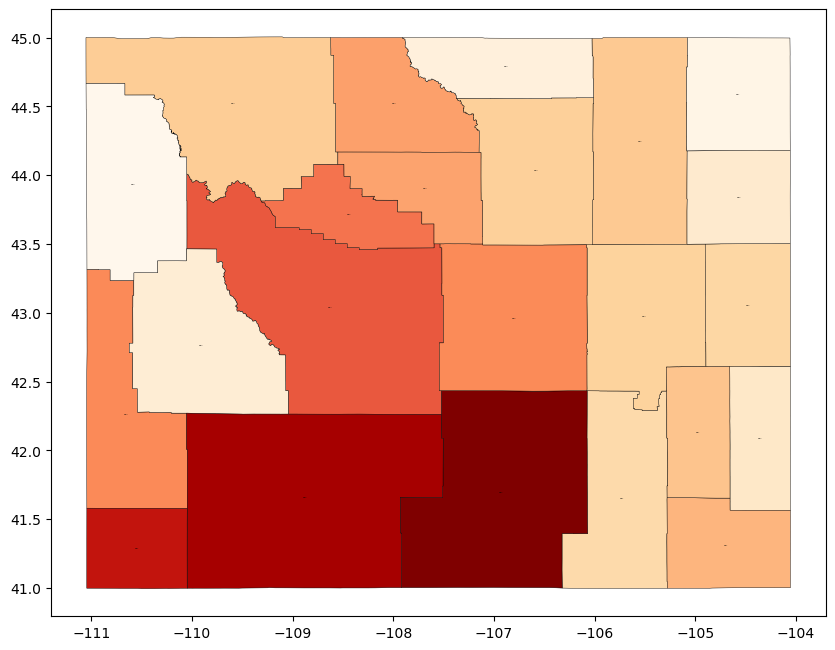

In [7]:
# Plot the data for the Washington DC, Virginia, Maryland, and West Virginia(county level)
ax = filtered_svi_df.plot(figsize=(10, 10), column="NOD_Rate", legend=False, cmap='OrRd', edgecolor='black',linewidth=0.3)

for idx, row in filtered_svi_df.iterrows():
    centroid = row.geometry.centroid
    county_name = row.FIPS
    ax.annotate(text=county_name, xy=(centroid.x, centroid.y), ha='center', fontsize=0.5)

# Display the plot
plt.show()

#### Saving dataframe to a shapefile

In [8]:
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(filtered_svi_df, geometry='geometry')

In [9]:

# Save the GeoDataFrame to a Shapefile
gdf.to_file("./data/processed data/SVI2020 WY counties with death rate HepVu/SVI2020_WY_counties_with_death_rate_HepVu.shp", driver='ESRI Shapefile')